## Convergence of a Binomial model value to BSM model value for a European option

The underlying assumption of the Binomial Model is that a portfolio consisting of delta shares of a stock and short position in an option should earn a risk free rate of return for the up movement and down movement.

The assumptions underlying Black-Scholes-Merton differential equation for a derivative dependent on a stock, imply that the same portfolio should instantaneously (i.e. over a very short time interval or when dt tends to zero) earn a risk free rate of return.

Therefore, when the number of time steps in the binomial model for valuing a European option is increased, the value of the option converges to the value from the Black-Scholes-Merton formula. 

In [1]:
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# arguments of the function european_binomial(S0,rf,T,N,sigma,K)
# S0 : Current stock price = 60 $
# rf : Risk free rate = 5 % or 0.05
# T : Time to maturity =  2 years
# N : Number of time steps 
# sigma : Volatility = 20 % or 0.20
# K : Exercise price = 50 $

In [3]:
def european_put_binomial(S0,rf,T,N,sigma,K):
    dt = T/N
    K = float(K)
    up = np.resize(np.arange(N+1), (N+1, N+1))
    down = up.transpose()*2
    S = S0 * np.exp(sigma*(dt ** 0.5) * (up - down))
    E = np.maximum(K - S,0)
    u = np.exp(sigma * (dt ** 0.5))
    d = 1 / u 
    p = ((np.exp(rf*dt) - d)/(u - d))
    A = np.zeros((N+1,N+1))
    A[:,-1] = E[:,-1]
    for i in range(N-1,-1,-1):
        for j in range(N-1,-1,-1):
            if j > i :
                continue
            else:
                A[j,i] = np.exp(-rf*dt)*(p * A[j,i+1] + (1-p) * A[j+1,i+1])
    return A[0,0]

In [4]:
n = norm.cdf 
def european_put_bsm(S0,rf,T,sigma,K):
    d1 = (np.log(S0/K) + (rf + (sigma**2 )/ 2) * T)/(sigma * (T ** 0.5))
    d2 = d1 - sigma * (T ** 0.5)
    p = K * np.exp(-rf*T) * n(-d2) - S0 * n(-d1)
    return p

In [5]:
bsm = european_put_bsm(60, 0.05, 2, 0.2,50)
binomial_values = []
l = range(1,1000,3)
for N in l:
    binom = european_put_binomial(60, 0.05, 2, N, 0.2, 50)
    binomial_values.append(binom)    

In [6]:
print("The value of the option with binomial model is "+str(binomial_values[-1].round(3)))
print("The value of the option with the BSM Model is "+str(bsm.round(3)))

The value of the option with binomial model is 1.225
The value of the option with the BSM Model is 1.224


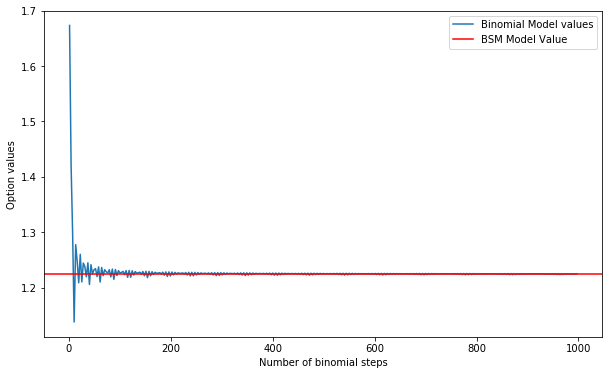

In [7]:
Nn = list(l)

plt.figure(figsize=(10,6))
plt.plot(Nn, binomial_values)
plt.axhline(bsm,color='r')

plt.xlabel('Number of binomial steps')
plt.ylabel('Option values')

plt.legend(['Binomial Model values','BSM Model Value']);